<a href="https://colab.research.google.com/github/MkSerdyuk/Tropes_Analizer/blob/main/tropes_analizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт материалов и библиотек

In [2]:
! git clone https://github.com/slowwavesleep/TvTropesMovieData.git

Cloning into 'TvTropesMovieData'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 80 (delta 25), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [3]:
import pandas as pd
from collections import Counter
from itertools import chain
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("/content/TvTropesMovieData/data/tropes_movie_data.csv")
df["tropes_list"] = df["tropes"].apply(lambda x: x.split("|"))

In [ ]:
df

,tropes_title,tropes,imdb_id,imdb_genres,movielens_id,tmdb_id,movielens_title,movielens_genres,movielens_year,tropes_list
0,ABBATheMovie,ActuallyPrettyFunny|Adorkable|AlmostKiss|AsHim...,75617,Comedy|Drama|Music,26380,14336,ABBA: The Movie (1977),Musical,1977.0,"[ActuallyPrettyFunny, Adorkable, AlmostKiss, A..."
1,ABCsOfDeath2,AbusiveParents|AirVentPassageway|AirVentPassag...,2926810,Comedy|Horror,117312,193726,The ABCs of Death 2 (2014),Comedy|Horror,2014.0,"[AbusiveParents, AirVentPassageway, AirVentPas..."
2,ABNKKBSNPLAko,ComingOfAgeStory|GayBestFriend|GenderInvertedT...,3547428,Comedy,176879,254866,ABNKKBSNPLAKo?! (2014),Comedy|Romance,2014.0,"[ComingOfAgeStory, GayBestFriend, GenderInvert..."
3,ABeautifulMind,AdultFear|AllThereIsToKnowAboutTheCryingGame|A...,268978,Biography|Drama,4995,453,"Beautiful Mind, A (2001)",Drama|Romance,2001.0,"[AdultFear, AllThereIsToKnowAboutTheCryingGame..."
4,ABetterTomorrow,AlmostLethalWeapons|BackupTwin|BadassInANiceSu...,92263,Action|Crime|Drama,26585,11471,"Better Tomorrow, A (Ying hung boon sik) (1986)",Crime|Drama|Thriller,1986.0,"[AlmostLethalWeapons, BackupTwin, BadassInANic..."
...,...,...,...,...,...,...,...,...,...,...
9257,Zulu,AnachronismStew|AntagonistTitle|ArtisticLicens...,58777,Drama|History|War,5899,14433,Zulu (1964),Action|Drama|War,1964.0,"[AnachronismStew, AntagonistTitle, ArtisticLic..."
9258,Zurich,ABirthdayNotABreak|AGoodWayToDie|AnAesop|Bitte...,3257638,Drama,141632,319513,Zurich (2015),Drama,2015.0,"[ABirthdayNotABreak, AGoodWayToDie, AnAesop, B..."
9259,Zwartboek,AdolfHitlarious|AllIssuesArePoliticalIssues|Am...,389557,Drama|Thriller|War,52042,9075,Black Book (Zwartboek) (2006),Drama|Thriller|War,2006.0,"[AdolfHitlarious, AllIssuesArePoliticalIssues,..."
9260,Zygote,AirventEscape|AnAxeToGrind|ArtificialHuman|Art...,7078780,Horror|Sci-Fi|Short,175643,464111,Zygote (2017),Horror|Sci-Fi,2017.0,"[AirventEscape, AnAxeToGrind, ArtificialHuman,..."


# Самописные функции анализа данных

In [5]:
def intersection(df, trop):
  tropes = df[df["tropes"].str.contains(trop)][["tropes", "tropes_list"]]
  unique_tropes = set()
  for trops in tropes["tropes_list"]:
    unique_tropes.update(trops)
  l = []
  for t in unique_tropes:
    if trop in t:
      continue
    l.append([sum(tropes["tropes"].str.contains(t))  , t])
  l.sort(key=lambda x: x[0], reverse=True)
  return l, tropes

In [6]:
def print_intersections(df, trop):
  l,tropes = intersection(df, trop)
  for i in range(len(l)):
    if l[i][0] < 10:
      break
    print(f"Троп \'{str(l[i][1])}\' встречается больше всех ({str(l[i][0])} раз)")

In [7]:
def top_tropes_by_year(df, year: int):
  trop_counter = Counter()
  year_tropes = df[df["movielens_year"].apply(lambda x: x == year)]["tropes_list"]
  trop_counter.update(chain(*year_tropes))
  return trop_counter

In [192]:
def visualize_preiod(df, year_start, year_end, n:int):
  tropes = Counter()
  year_start, year_end = min(year_start, year_end), max(year_start, year_end)
  for year in range(year_start, year_end+1):
    tropes.update(top_tropes_by_year(df, year))
  top_tropes = tropes.most_common(n)
  Ys = []
  for trop in top_tropes:
    Y = []
    for year in range(year_start, year_end+1):
      top = top_tropes_by_year(df, year)
      Y.append(top[trop[0]])
    Ys.append(Y)
  fig, ax = plt.subplots(figsize=(21, 9))
  X = []
  for i in range(year_start, year_end+1):
    X.append(i)
  for i in range(len(Ys)):
    bottom = [0 for j in range(len(Ys[0]))]
    for j in range(len(Ys[i])):
      for k in range(i):
        bottom[j] += Ys[k][j]
    ax.bar(X, Ys[i], label=top_tropes[i][0], bottom=bottom)  
  ax.legend()
  plt.show()

# Анализ данных

## Задача 2

**Условие**:
Найти, сколько раз троп "Спасение принцессы встречается вместе с тропом "Финальный босс"

In [ ]:
l ,boss = intersection(df, "FinalBosss")

In [ ]:
SPtrops = ['YourPrincessIsInAnotherCastle','SaveThePrincess','PrincessAndDragon']

In [ ]:
print('SavePrincess  встречается вместе с FinalBoss', sum([boss.apply(lambda x: t in x).count() for t in SPtrops]), "раз")

SavePrincess  встречается вместе с FinalBoss 6 раз


# Задача 3

**Условие** Найти самые популярные тропы 60-х, 70-х, 80-х, 90-х, 00-x

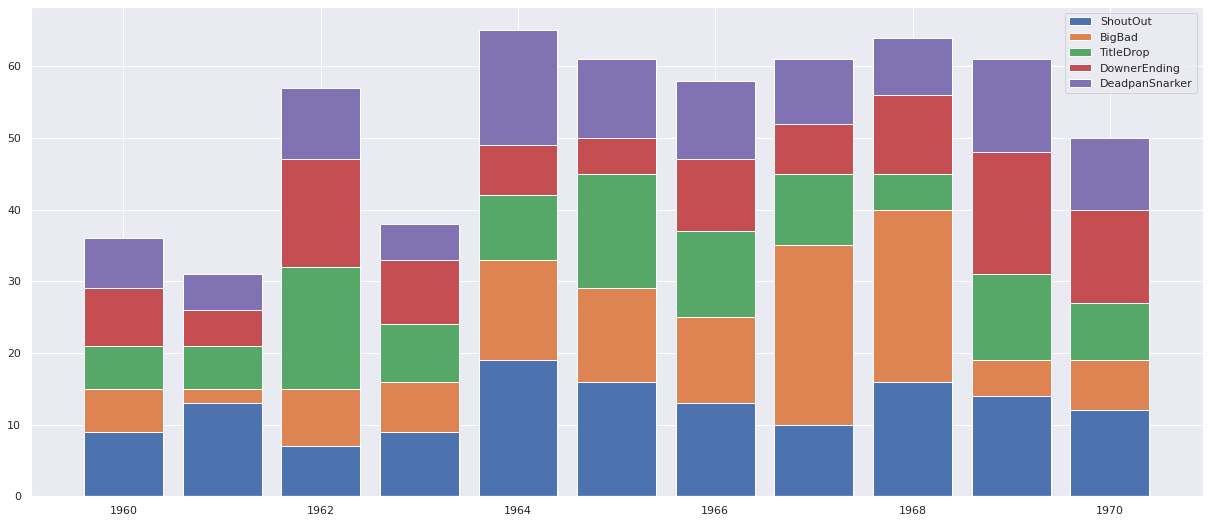

In [197]:
visualize_preiod(df, 1960, 1970, 5)

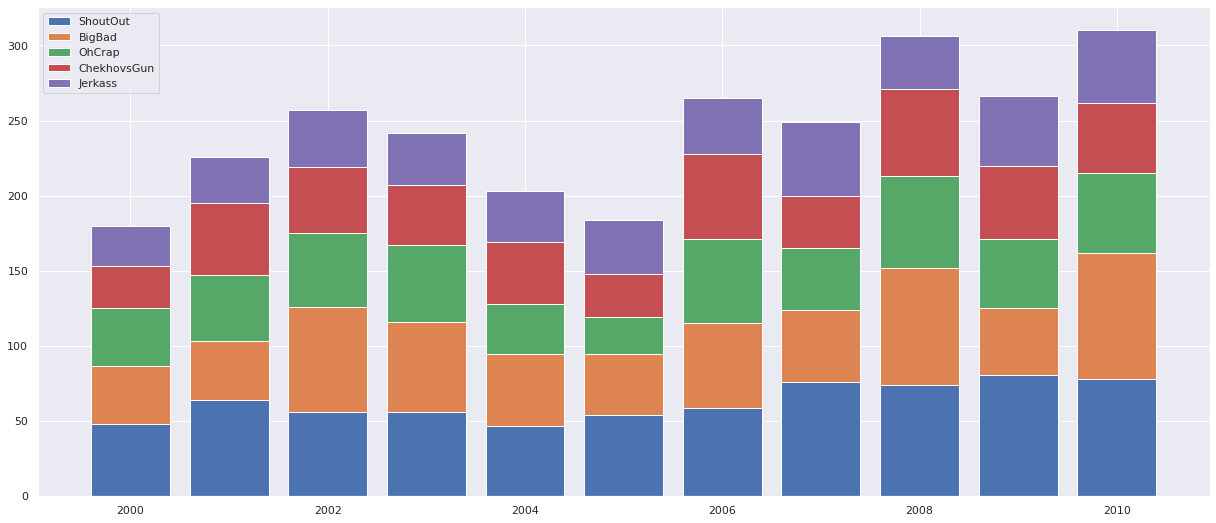

In [194]:
visualize_preiod(df, 2000, 2010, 5)